# Test mixed model workflow

In [1]:
import common_functions as core

In [2]:
sketch_to_image = core.load_model(core.A3)
front_to_right = core.load_model(core.B1)
front_to_back = core.load_model(core.C1)
right_to_left = core.load_model(core.D1)
image_to_next_sprite = core.load_model(core.E1)
test_image = "/Users/tashvit/Documents/GitHub/mmpixagen/datasets/model_a3_data/pix2pix_input/test/02192.png"

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 64                            	[default: 256]
                 dataroot: datasets/model_a3_data        	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 64                            	[default: 256]
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter:

In [3]:
front_facing = sketch_to_image.evaluate(test_image)
right_facing = front_to_right.evaluate(image=front_facing)
back_facing = front_to_back.evaluate(image=front_facing)
left_facing = right_to_left.evaluate(image=right_facing)
direction_images = [front_facing, right_facing, back_facing, left_facing]
# For each directional image, attempt to generate individual sprite images using next_sprite_image model (E1)
sprites = []
for single_image in direction_images:
    curr = single_image
    sprites.append(curr)
    for i in range(7):
        curr = image_to_next_sprite.evaluate(image=curr)
        sprites.append(curr)

# Input sketch

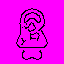

In [4]:
core.load_with_magenta_background(test_image)

# Output spritesheet

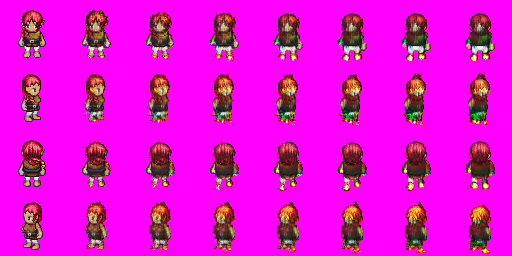

In [5]:
grid = core.images_to_sprite_sheet(sprites)
grid